In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

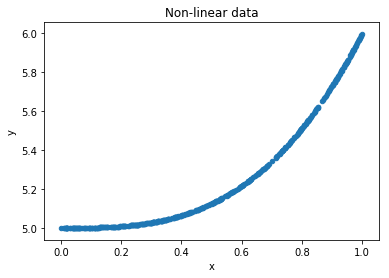

In [24]:
# generate some random data
df = pd.DataFrame()
df['x'] = np.random.rand(500,1).flatten()
df['y'] = df['x'] ** 3 + 5
_=df.plot.scatter(x='x',y='y',title='Non-linear data')

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

,x,y,yhat
0,0.734772,5.396696,5.395747
1,0.715509,5.366307,5.369478


mse=0.00002


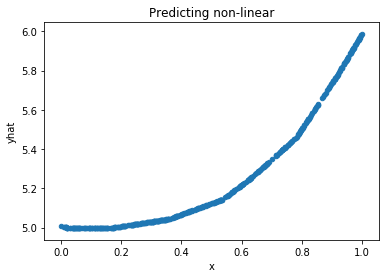

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree, ensemble, linear_model, svm

# X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1) \
# , y_train.values.reshape(-1,1), y_test.values.reshape(-1,1)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='lbfgs')
# gs = GridSearchCV(mlp, param_grid={'activation': ["identity", "logistic", "tanh", "relu"]},cv=3)
mlp.fit(df.x.values.reshape(-1,1),df.y.ravel())
# print('best')
# print(gs.best_estimator_)

df['yhat'] = mlp.predict(df.x.values.reshape(-1,1))
df.head(2)
_=df.plot.scatter(x='x',y='yhat',title='Predicting non-linear')
print('mse={:.5f}'.format(mean_squared_error(df.yhat,df.y)))

### Keras

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers


mse=15.23032


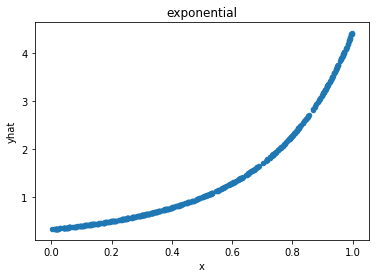

In [138]:
for a in ['exponential']:
# relu,'tanh','sigmoid','exponential','softmax','softplus']:
    model = Sequential()
    _=model.add(Dense(20, activation=a, input_dim=1))
    _=model.add(Dense(10, activation=a, input_dim=1))
    _=model.add(Dense(5, activation=a, input_dim=1))
    _=model.add(Dense(1, kernel_initializer='normal'))
    _=model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    _=model.fit(df.x.values.reshape(-1,1),df.y.ravel(),epochs=5,verbose=0)
    df['yhat'] = model.predict(df.x.values.reshape(-1,1))
#     df.head(2)
    _=df.plot.scatter(x='x',y='yhat',title=a)
    print('mse={:.5f}'.format(mean_squared_error(df.yhat,df.y)))